<a href="https://colab.research.google.com/github/xiexukang/tensorflow-/blob/master/tf2_0%E9%A1%B9%E7%9B%AE%E5%AE%9E%E6%88%981%2Cmnist%E6%95%B0%E6%8D%AE%E9%9B%86%E9%AA%8C%E8%AF%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf


In [2]:
print(dir(tf))

['AggregationMethod', 'Assert', 'CriticalSection', 'DType', 'DeviceSpec', 'GradientTape', 'Graph', 'IndexedSlices', 'IndexedSlicesSpec', 'Module', 'Operation', 'OptionalSpec', 'RaggedTensor', 'RaggedTensorSpec', 'RegisterGradient', 'SparseTensor', 'SparseTensorSpec', 'Tensor', 'TensorArray', 'TensorArraySpec', 'TensorShape', 'TensorSpec', 'TypeSpec', 'UnconnectedGradients', 'Variable', 'VariableAggregation', 'VariableSynchronization', '_API_MODULE', '_LazyLoader', '__all__', '__builtins__', '__cached__', '__compiler_version__', '__cxx11_abi_flag__', '__doc__', '__file__', '__git_version__', '__loader__', '__monolithic_build__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_absolute_import', '_api', '_compat', '_current_file_location', '_current_module', '_distutils', '_division', '_estimator_module', '_fi', '_inspect', '_ll', '_logging', '_main_dir', '_major_api_version', '_module_dir', '_module_util', '_names_with_underscore', '_os', '_plugin_dir', '_print_functi

In [3]:
mnist = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
(train_x,train_y),(test_x,test_y) = mnist

In [5]:
train_x.shape

(60000, 28, 28)

# 使用matplotlib画出几张mnist数据集的图片

In [0]:
import matplotlib.pyplot as plt


In [7]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
train_y[0]

5

In [9]:
dir(plt)


['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_get_running_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 'acorr',
 'angle_spectrum',
 'annotate',
 'arrow',
 'autoscale',

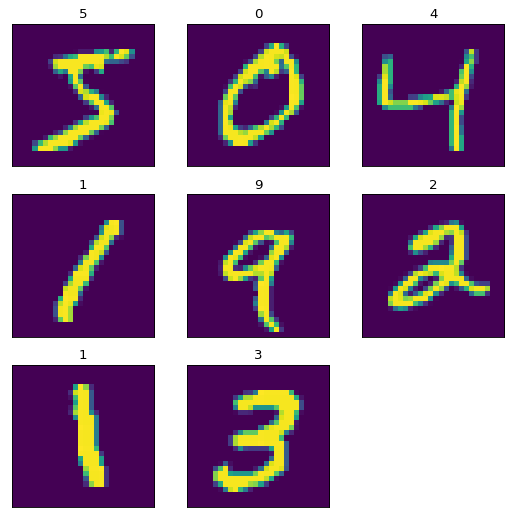

In [10]:
plt.figure(figsize=(8,8),dpi=80)#画布大小

for i in range(8):
  plt.subplot(3,3,i+1)

  plt.imshow(train_x[i])
  plt.title("%s"%train_y[i])
  plt.xticks([])#去掉坐标线
  plt.yticks([])
  

# 数据处理

In [0]:
train_x,test_x = train_x/255.0, test_x/255.0

In [12]:
train_x[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
train_y = tf.one_hot(train_y,depth=10)

In [0]:
train_y = tf.cast(train_y,dtype=tf.int8)

In [0]:
test_y = tf.one_hot(test_y,depth=10,dtype=tf.int8)

In [16]:
test_x.shape

(10000, 28, 28)

In [17]:
test_y.shape

TensorShape([10000, 10])

# 搭建模型


1.   softmax逻辑回归
2.   使用cnn预测



In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten()
                  ,tf.keras.layers.Dense(10,activation='softmax')])


In [0]:
model.build(input_shape=train_x.shape)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [22]:
model.fit(train_x,train_y,batch_size=64,epochs=20,validation_data=(test_x,test_y),shuffle=True,validation_freq=5)

Epoch 1/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0227 - accuracy: 0.8663
Epoch 2/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0137 - accuracy: 0.9141
Epoch 3/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0125 - accuracy: 0.9211
Epoch 4/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0118 - accuracy: 0.9257
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0114 - accuracy: 0.9286 - val_loss: 0.0112 - val_accuracy: 0.9298
Epoch 6/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0110 - accuracy: 0.9305
Epoch 7/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0108 - accuracy: 0.9324
Epoch 8/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0106 - accuracy: 0.9337
Epoch 9/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0105 - accuracy: 0.9345
Epoch 10/20
938/938 [==============================] - 2s 

In [0]:
#根据训练好的模型去预测
predicts = model.predict(test_x,batch_size=40)

In [0]:
#利用tf.equal()判断真实数据和预测数据的差异，通过tf.argmax来讲最大概率的标签转为索引，1为axis的方向
correct_prediction = tf.equal(tf.argmax(predicts[0:100],1),tf.argmax(test_y[0:100],1))

In [0]:
#计算精确度
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [26]:
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.97>

In [27]:
correct_prediction

<tf.Tensor: shape=(100,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [0]:
#利于二维卷积的模型去预测
model1= tf.keras.models.Sequential([tf.keras.layers.Conv2D(5,3),
                    tf.keras.layers.BatchNormalization(),
                    tf.keras.layers.Activation('relu'),
                    tf.keras.layers.MaxPool2D((2,2)),
                    tf.keras.layers.Conv2D(5,3,activation='relu'),
                    tf.keras.layers.MaxPool2D((2,2)),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(64,activation='relu'),
                    tf.keras.layers.Dense(10,activation='softmax')])
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_x=tf.reshape(train_x, (train_x.shape[0],train_x.shape[1],train_x.shape[2], 1))
test_x=tf.reshape(test_x, (test_x.shape[0],test_x.shape[1],test_x.shape[2], 1))

In [49]:
test_x.shape

TensorShape([10000, 28, 28, 1])

In [0]:
model1.build(input_shape=train_x.shape)

In [51]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            multiple                  50        
_________________________________________________________________
batch_normalization_4 (Batch multiple                  20        
_________________________________________________________________
activation_4 (Activation)    multiple                  0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_9 (Conv2D)            multiple                  230       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_5 (Flatten)          multiple                 

In [52]:
train_y.shape

TensorShape([60000, 10])

In [54]:
histoy=model1.fit(train_x,train_y,epochs=3,batch_size=64,validation_data=(test_x,test_y),shuffle=True,validation_freq=5)

Epoch 1/3
938/938 [==============================] - 29s 31ms/step - loss: 0.0104 - accuracy: 0.9965
Epoch 2/3
938/938 [==============================] - 29s 31ms/step - loss: 0.0111 - accuracy: 0.9961
Epoch 3/3
938/938 [==============================] - 29s 31ms/step - loss: 0.0094 - accuracy: 0.9967


# 模型可视化操作

In [0]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

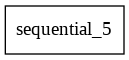

In [56]:
plot_model(model1,to_file='cnn.png',show_shapes=True)
Image('cnn.png')

In [58]:
#查看history
histoy.history

{'accuracy': [0.996483325958252, 0.9961166381835938, 0.9967333078384399],
 'loss': [0.010363968089222908, 0.011088165454566479, 0.009405815042555332]}